# PyNEST - First Steps

* Connect another neuron to the first neuron recieving that spike

In [1]:
import nest # import NEST module
%matplotlib inline
import matplotlib.pyplot as plt

## Creating a neuron

In [2]:
# before creating a new network,
# reset the simulation kernel / remove all nodes
nest.ResetKernel()

In [3]:
# create the neuron
neuron1 = nest.Create('iaf_psc_exp')
neuron2 = nest.Create('iaf_psc_exp')

# adding constant current in neuron 1
nest.SetStatus(neuron1, {"I_e": 376.0})

## Creating a voltmeter

In [4]:
# create a voltmeter for recording
mult1 = nest.Create('multimeter')
mult2 = nest.Create('multimeter')

nest.SetStatus(mult1, {"withtime":True, "record_from":["V_m"]})
nest.SetStatus(mult2, {"withtime":True, "record_from":["V_m"]})

## Connecting

In [5]:
nest.Connect(neuron1, neuron2, syn_spec={'weight': 1e3, "delay": 2.0})

nest.Connect(mult1, neuron1)
nest.Connect(mult2, neuron2)

## Simulating

In [6]:
# run simulation for 100 ms
nest.Simulate(200.)

In [7]:
# read out recording time and voltage from voltmeter
times1 = nest.GetStatus(mult1)[0]['events']['times']
voltages1 = nest.GetStatus(mult1)[0]['events']['V_m']

times2 = nest.GetStatus(mult2)[0]['events']['times']
voltages2 = nest.GetStatus(mult2)[0]['events']['V_m']

## Plotting

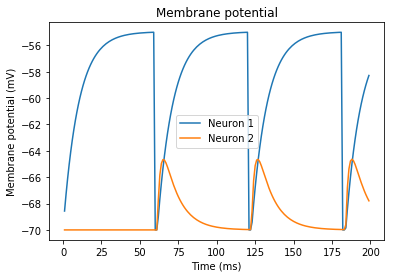

In [8]:
# plot results
# units can be found in documentation
plt.plot(times1, voltages1, label='Neuron 1')
plt.plot(times2, voltages2, label='Neuron 2')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential')
plt.legend()